In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from numpy import log,sqrt
import sklearn
from sklearn import metrics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments data sci/4/delivery time/delivery_time.csv')

In [4]:
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Visualisation and EDA

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

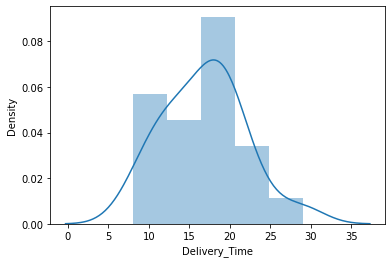

In [5]:
sns.distplot(data['Delivery_Time'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

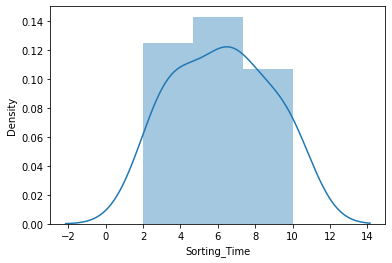

In [6]:
sns.distplot(data['Sorting_Time'])

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

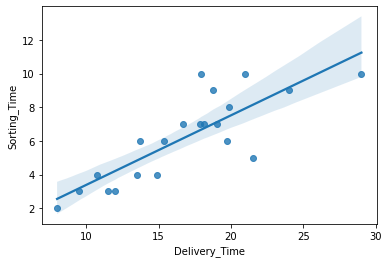

In [7]:
sns.regplot(x="Delivery_Time",y="Sorting_Time",data=data)

In [8]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


## Model Building

## We are going to build the model in 4 different forms 
### 1 Without transformation
### 2 Log transformation
### 3 Exponential transformation
### 4 Quadratic Transformation
### 5 Polinomial transformation 

### 1. Without Transfromation

In [9]:
model=smf.ols("Delivery_Time~Sorting_Time",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        05:49:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting Values

In [10]:
new_data=pd.Series([7,6])
new_data

0    7
1    6
dtype: int64

In [11]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,7
1,6


In [12]:
values=model.predict(data_pred)

In [13]:
matrix=pd.DataFrame()
matrix['Actual Values']=pd.Series([19,19.75])
matrix['Predicted Value withou transform']=values
matrix

,Actual Values,Predicted Value withou transform
0,19.00,18.125873
1,19.75,16.476853


In [14]:
error_wo_trnsf= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted Value withou transform']))
print('RMSE for the above model is:',error_wo_trnsf)

RMSE for the above model is: 2.3955778580810354


### 2 Log Transform




In [15]:
data['log_sort_time']=np.log(data['Sorting_Time'])
data

,Delivery_Time,Sorting_Time,log_sort_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


In [16]:
model_log=smf.ols("Delivery_Time~log_sort_time",data=data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        05:49:44   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
log_sort_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Predicting Values

In [17]:
data_pred_log=pd.DataFrame(pd.Series([np.log(7),np.log(6)]),columns=['log_sort_time'])
data_pred_log

,log_sort_time
0,1.945910
1,1.791759


In [18]:
values_log= model_log.predict(data_pred_log)

In [19]:
matrix['Predicted Value log']=values_log
matrix

,Actual Values,Predicted Value withou transform,Predicted Value log
0,19.00,18.125873,18.757354
1,19.75,16.476853,17.363305


In [20]:
error_log= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted Value log']))
print('RMSE for the above model is:',error_log)

RMSE for the above model is: 1.696347447741985


### 3 Exponential Transform

In [21]:
data['log_delivery']=np.log(data['Delivery_Time'])
data

,Delivery_Time,Sorting_Time,log_sort_time,log_delivery
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


In [22]:
model_exp=smf.ols("log_delivery~Sorting_Time",data=data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        05:49:44   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
log_sort_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Predicting Values

In [23]:
data_pred_exp=pd.DataFrame(pd.Series([7,6]),columns=['Sorting_Time'])
data_pred_exp

,Sorting_Time
0,7
1,6


In [24]:
values_exp= model_exp.predict(data_pred_exp)

In [25]:
matrix['Predicted Value exp']=values_exp
matrix

,Actual Values,Predicted Value withou transform,Predicted Value log,Predicted Value exp
0,19.00,18.125873,18.757354,2.860233
1,19.75,16.476853,17.363305,2.754681


In [26]:
error_exp= np.sqrt(metrics.mean_squared_error(np.log(matrix['Actual Values']),matrix['Predicted Value exp']))
print('RMSE for the above model is:',error_exp)

RMSE for the above model is: 0.1721774044216294


### 4. Quadratic Transformation

In [27]:
data['Sqr_sort_time']=data['Sorting_Time']**2
data

,Delivery_Time,Sorting_Time,log_sort_time,log_delivery,Sqr_sort_time
0,21.00,10,2.302585,3.044522,100
1,13.50,4,1.386294,2.602690,16
2,19.75,6,1.791759,2.983153,36
3,24.00,9,2.197225,3.178054,81
4,29.00,10,2.302585,3.367296,100
5,15.35,6,1.791759,2.731115,36
6,19.00,7,1.945910,2.944439,49
7,9.50,3,1.098612,2.251292,9
8,17.90,10,2.302585,2.884801,100
9,18.75,9,2.197225,2.931194,81


In [28]:
model_quad=smf.ols("Delivery_Time~Sqr_sort_time+Sorting_Time",data=data).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.39e-05
Time:                        05:49:44   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5222      4.160      0.847      0.408      -5.217      12.261
Sqr_sort_time    -0.0932      0.115     -0.810      0.429      -0.335       0.149
Sorting_Time      2.8130      1.461      1.926      0.070      -0.256       5.882
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predicting Values

In [29]:
data_pred_quad=pd.DataFrame(pd.Series([7,6]),columns=['Sorting_Time'])
data_pred_quad['Sqr_sort_time']=data_pred_quad['Sorting_Time']**2
data_pred_quad

,Sorting_Time,Sqr_sort_time
0,7,49
1,6,36


In [30]:
values_quad=model_quad.predict(data_pred_quad)

In [31]:
matrix['Predicted Value quad']=values_quad
matrix

,Actual Values,Predicted Value withou transform,Predicted Value log,Predicted Value exp,Predicted Value quad
0,19.00,18.125873,18.757354,2.860233,18.646533
1,19.75,16.476853,17.363305,2.754681,17.045108


In [32]:
error_quad= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted Value quad']))
print('RMSE for the above model is:',error_quad)

RMSE for the above model is: 1.9289087257194064


### 5 Polynomial Transformation

In [33]:
data['cube_sort_time']=data['Sorting_Time']**3
data

,Delivery_Time,Sorting_Time,log_sort_time,log_delivery,Sqr_sort_time,cube_sort_time
0,21.00,10,2.302585,3.044522,100,1000
1,13.50,4,1.386294,2.602690,16,64
2,19.75,6,1.791759,2.983153,36,216
3,24.00,9,2.197225,3.178054,81,729
4,29.00,10,2.302585,3.367296,100,1000
5,15.35,6,1.791759,2.731115,36,216
6,19.00,7,1.945910,2.944439,49,343
7,9.50,3,1.098612,2.251292,9,27
8,17.90,10,2.302585,2.884801,100,1000
9,18.75,9,2.197225,2.931194,81,729


In [34]:
model_poly=smf.ols("Delivery_Time~cube_sort_time+Sqr_sort_time+Sorting_Time",data=data).fit()
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     13.44
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           9.59e-05
Time:                        05:59:55   Log-Likelihood:                -50.633
No. Observations:                  21   AIC:                             109.3
Df Residuals:                      17   BIC:                             113.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.1582     10.987     -0.378      0.710     -27.338      19.021
cube_sort_time     0.0445      0.059      0.757      0.460      -0.079       0.168
Sqr_sort_time     -0.9253      1.106     -0.837      0.414      -3.258       1.407
Sorting_Time       7.5025      6.370      1.178      0.255      -5.937      20.942
==============================================================================
Omnibus:                        2.616   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.428
Skew:                           0.630   Prob(JB):                        0.490
Kurtosis:                       3.204   Cond. No.                     9.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction

In [35]:
data_pred_poly=pd.DataFrame(pd.Series([7,6]),columns=['Sorting_Time'])
data_pred_poly['Sqr_sort_time']=data_pred_poly['Sorting_Time']**2
data_pred_poly['cube_sort_time']=data_pred_poly['Sorting_Time']**3
data_pred_poly

,Sorting_Time,Sqr_sort_time,cube_sort_time
0,7,49,343
1,6,36,216


In [36]:
values_poly=model_poly.predict(data_pred_poly)

In [38]:
matrix['Predicted Value poly']=values_poly
matrix

,Actual Values,Predicted Value withou transform,Predicted Value log,Predicted Value exp,Predicted Value quad,Predicted Value poly
0,19.00,18.125873,18.757354,2.860233,18.646533,18.270140
1,19.75,16.476853,17.363305,2.754681,17.045108,17.150048


In [39]:
error_poly= np.sqrt(metrics.mean_squared_error(matrix['Actual Values'],matrix['Predicted Value poly']))
print('RMSE for the above model is:',error_poly)

RMSE for the above model is: 1.9095086937697259


In [40]:
a=[['Without trnasform',error_wo_trnsf],['Log transform',error_log],['Exponential transform',error_exp],['Quadratic Transform',error_quad],['Polynomial transform',error_poly]]
b=pd.DataFrame(a,columns=['Transfromation','RMSE'])
print('In conclusion the root mean sqaured value for different transforms are:')
print(b)

In conclusion the root mean sqaured value for different transforms are:
          Transfromation      RMSE
0      Without trnasform  2.395578
1          Log transform  1.696347
2  Exponential transform  0.172177
3    Quadratic Transform  1.928909
4   Polynomial transform  1.909509


## Hence looking at the above table we can make a choice as exponential transform has the least error 
